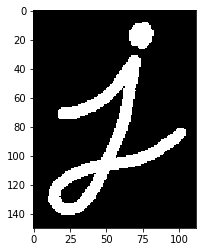

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from utils import Histogram, Threshold, padding
from PIL import Image


img = Image.open("./res/j.png").convert("L")
img = np.asarray(img)

plt.imshow(img, cmap="gray")

In [2]:
def erosion(boundary=None, kernel=None):
    """
    erosion operation
    - a pixel element is 0 at least under kernel is 0
    -> return 0
    """
    boundary = boundary * kernel
    if (np.min(boundary) == 0):
        return 0
    else:
        return 255

def dilation(boundary=None, kernel=None):
    """
    erosion operation
    - a pixel element is not 0 at least under kernel is not 0
    -> return 255
    """
    boundary = boundary * kernel
    if (np.max(boundary) != 0):
        return 255
    else:
        return 0

def openning(img=None, k_size=None):
    """
    openning operation
    - erosion followed by dilation
    - it removes noise
    """
    erosion_img = morphology(img=img, method=1, k_size=k_size)
    opened_img = morphology(img=erosion_img, method=2, k_size=k_size)
    return opened_img

def closing(img=None, k_size=None):
    """
    closing operation
    - dilation follwed by erosion
    - it can close small holes inside the objects. 
    """
    dilation_img = morphology(img=img, method=2, k_size=k_size)
    closed_img = morphology(img=dilation_img, method=1, k_size=k_size)
    return closed_img


def morphology(img=None, method=None, k_size=None):
    """
    input
    img : input image
    method : 1(erosion), 2(dilation), 3(openning), 4(closing)
    k_size : kernel size
    
    output
    res_img : morphology operation image
    """
    rows, cols = img.shape
    pad_img = padding(img, k_size)
    kernel = np.ones((k_size,k_size))
    res_img = img.copy()
    
    if method == 1 or method == 2:
        for i in range(0, rows):
            for j in range(0, cols):
                if method == 1: #erosion operation
                    res_img[i, j] = erosion(pad_img[i:i+k_size, j:j+k_size], kernel)
                elif method == 2: #
                    res_img[i, j] = dilation(pad_img[i:i+k_size, j:j+k_size], kernel)
    if method == 3:
        res_img = openning(img, k_size=k_size)
    elif method == 4:
        res_img = closing(img, k_size=k_size)

    return res_img



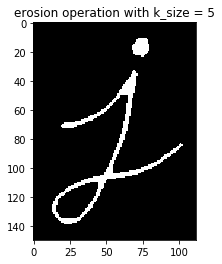

In [3]:
res = morphology(img, method=1, k_size=5)
plt.title("erosion operation with k_size = 5")
plt.imshow(res, cmap="gray")

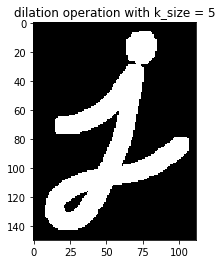

In [4]:
res = morphology(img, method=2, k_size=5)
plt.title("dilation operation with k_size = 5")
plt.imshow(res, cmap="gray")

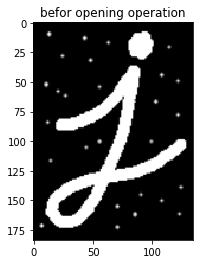

In [5]:
noised_j = Image.open("./res/noised_j.PNG").convert("L")
noised_j = np.asarray(noised_j)
plt.title("befor opening operation")
plt.imshow(noised_j, cmap="gray")

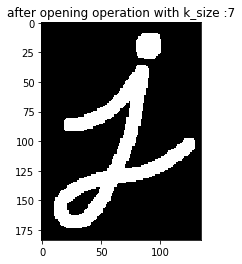

In [6]:
res = morphology(noised_j, method=3, k_size=7)
plt.title("after opening operation with k_size :7")
plt.imshow(res, cmap="gray")

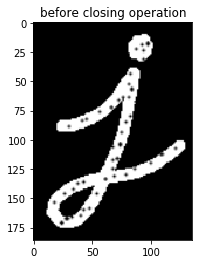

In [7]:
small_hole = Image.open("./res/j_small_hole.PNG").convert("L")
small_hole = np.asarray(small_hole)
plt.title("before closing operation")
plt.imshow(small_hole, cmap="gray")

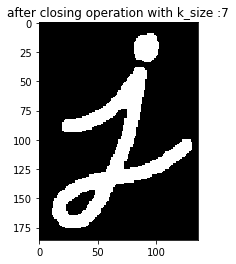

In [8]:
res = morphology(small_hole, method=4, k_size=5)
plt.title("after closing operation with k_size :7")
plt.imshow(res, cmap="gray")